# Data Exploration

The goal of this notebook is to get a closer look at the news articles and grasp a better understanding of their content: repartition across time, topics, style etc.

__Contents__

Imports

1. A few statistics

2. Getting a closer look at the text

3. Preprocessing

__Imports__

In [1]:
# classic packages
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

You may not already have SpaCy in your current setup.
Here are the commands you need to execute to download SpaCy and its language specigic functionalities. NB: I am a Mac user, here for French. Visit [this link](https://spacy.io/usage) for further instructions and this link for more information on the [pre-trained models for French](https://spacy.io/models/fr).

    $ pip install -U spacy
    
    $ python3 -m spacy download fr 
    
Alternatively:

    $ python3 -m spacy download fr_core_news_sm 
    
But beware that fr_core_news_sm might still be reachable only under the simple name 'fr' (see [package linking issue on StackOverflow](https://stackoverflow.com/questions/54334304/spacy-cant-find-model-en-core-web-sm-on-windows-10-and-python-3-5-3-anacon) ).
    
In case you face an environment issue (see [env issue on GitHub](https://github.com/explosion/spaCy/issues/4577)), uninstall spacy and try again, this time with the following command for language specific dependencies : 

    $ pip3 install https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.0.0a0/fr_core_news_sm-3.0.0a0.tar.gz
    
Note: for English

    $ python3 -m spacy download en_core_web_sm
    
    $ pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz 
    
And for loading it, try :

> nlp = spacy.load("en_core_web_sm") 

> nlp = spacy.load('en')

In [2]:
# NLP packages
#import nltk
# nltk.download()...
import spacy
try: 
    print("fr_core_news_sm loaded")
    nlp = spacy.load("fr_core_news_sm") # load pre-trained models for French
except:
    print("fr loaded")
    nlp=spacy.load('fr') # fr calls fr_core_news_sm 
import gensim

fr_core_news_sm loaded


In [8]:
# data
news_df=pd.read_csv("./articles.csv")

## 1. A few statistics

Most articles were published between 1990 and 1999. 

In [9]:
print("Total number of articles: ", len(news_df))

Total number of articles:  726


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff927017640>]],
      dtype=object)

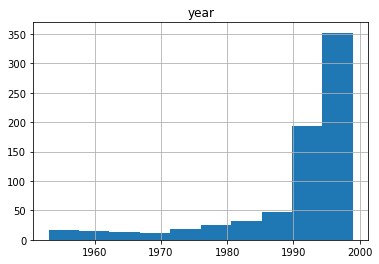

In [10]:
# histogram: number of articles for each year
news_df.hist('year')

Articles have a broad range of lengths.  However most of the texts are below 5000 words.

Minimum length of a text: 301 words
Maximum length of a text: 37701 words
Average length of a text: 5630 words
Standard deviation:       5688 words


[]

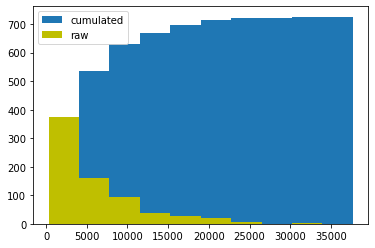

In [11]:
# article length in words

# min, max, mean, avg, standard deviation
text_length=news_df['text'].apply(lambda x:len(x))
print("Minimum length of a text: %s words" %min(text_length))
print("Maximum length of a text: %s words" %max(text_length))
print("Average length of a text: %4.f words" %np.mean(text_length))
print("Standard deviation:       %4.f words" %np.std(text_length))

# hist
plt.hist(text_length, bins=10, cumulative=True, label="cumulated")
plt.hist(text_length, bins=10, color='y', label = "raw") 
plt.legend()
plt.plot()

## 2. Getting a closer look at the text

In [22]:
# print an article
print("\n".join(news_df.title[0].split("\n")[:5]))
print("\n".join(news_df.text[0].split("\n")[:5]))

Tintin dans l'espace
Trois semaines à bord de la station soviétique Mir. A 50 ans, Jean-Loup Chrétien sera le premier Ouest-Européen a sortir dans l'espace.
L'orgueil fou d'avoir survolé l'humanité est monté au cerveau de certains. Pas au sien. Ce général trois étoiles qui vous torche d'un air tranquille sa douzaine d'escargots de Bourgogne sur une péniche-restaurant de la Moskova, et les relève avec gourmandise d'une gorgée de bordeaux Potel et Chabot, s'apprêtera, d'ici à quelques heures, à transpercer la voûte céleste pour rejoindre la station soviétique Mir. Un pétard de 310 tonnes allumé sous les fesses. Pas plus stressé qu'à l'ordinaire. La classe, c'est ça.
Jean-Loup Chrétien sera, sauf incident de dernière minute, auquel cas il serait remplacé par sa «doublure», Michel Tognini, le premier spationaute ouest-européen à effectuer une mission de longue durée (trois semaines) et à marcher dans le vide spatial. Voilà de quoi faire vibrer la fibre cocardière et, c'est sûr, revigorer l

In [12]:
# most frequent words in the corpus
words=[]
for t in news_df.text:
    words+=t.split()
    
c=Counter(words)
for w in c.most_common(20):
    print(w)

('de', 34612)
('la', 18270)
('le', 13652)
('à', 12882)
('les', 12832)
('des', 10497)
('et', 10299)
('en', 7939)
('du', 7554)
('un', 6219)
('que', 5248)
('qui', 5044)
('dans', 4883)
('une', 4639)
('pour', 4361)
('a', 4294)
('au', 3890)
('par', 3756)
('est', 3712)
('pas', 3646)


In [13]:
print([w.lower() for (w,_) in c.most_common(100)])

['de', 'la', 'le', 'à', 'les', 'des', 'et', 'en', 'du', 'un', 'que', 'qui', 'dans', 'une', 'pour', 'a', 'au', 'par', 'est', 'pas', 'ne', 'plus', 'se', 'sur', 'il', 'son', 'ce', 'avec', 'sont', '-', 'le', 'il', 'aux', 'ses', 'les', ':', 'ont', '"', 'la', 'ou', 'sa', 'leur', "d'un", 'comme', "d'une", 'cette', 'on', "qu'il", 'tout', 'mais', 'nous', 'même', 'été', 'mais', 'deux', 'lui', 'et', "c'est", 'sans', 'y', 'fait', 'a', 'en', 'où', 'ces', 'bien', 'leurs', 'si', 'ils', "c'est", "n'est", 'elle', 'faire', 'avait', 'depuis', 'entre', 'dont', 'aussi', 'on', 'un', 'moins', 'je', 'peut', 'tous', 'pays', 'encore', 'était', 'être', 'ce', 'pour', 'contre', 'très', 'dans', '000', 'quelques', 'peu', 'après', '?', 'ils', 'ans']


Necissity of cleaning and preprocessing the data before going any further: the words we have just obtained should be considered as stopwords! They do not bring any useful information about the actual content of the articles.

# 3. First pipelines with spaCy



From [SpaCy Doc](https://spacy.io/usage/processing-pipelines): When you call nlp on a text, spaCy will tokenize it and then call each component on the Doc, in order. It then returns the processed Doc that you can work with.



__Preprocessing basics [on hold]__

* All words to lower case. Type incompatibility : str  is not doc type for spacy => convert to lower case before building the pipe. See below.
* To do (mainly for core text analysis) : select words we want to add to our stopwords list or use standard French stopword list
* Punctuation removal: spaCy pipelines are not hindered by punctuation. Depending on what package we use we can leave this part aside for now
* obtain lemmas or tokens : will be useful when we build models to compare documents

__NER on titles__

Let's just work on __titles__ to begin with. They are supposed to contain essential information about the article, so we can already obtain a meaningful list of key entities from them.

In [14]:
nlp = spacy.load("fr") # reload
# Create pipe containing all titles
titles=list(nlp.pipe(news_df.title.apply(lambda x: x.lower()), disable=["tagger", "parser"]) ) #"pipeline": ["tagger", "parser", "ner"]
# Here we just perform NER so we disable the tagger and parser which are by default in the pipeline

print(titles[:5])

[tintin dans l'espace, le faux suicide de robert boulin, des pierres contre les certitudes, otages: soudain, mercredi soir..., les secrets de la planète rouge]


In [18]:
for doc in titles: #"pipeline": ["tagger", "parser", "ner"]
    # Do something with the doc here
    print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == 'PER'])

[]
[('robert boulin', 'PER')]
[]
[]
[]
[]
[('pierre quinon', 'PER')]
[]
[]
[]
[('georges besse', 'PER')]
[]
[]
[]
[]
[]
[]
[('darwin', 'PER')]
[('dayan', 'PER')]
[]
[('shimon pérès', 'PER')]
[]
[('simone veil', 'PER')]
[]
[]
[]
[('paul touvier', 'PER')]
[]
[]
[('pinochet', 'PER')]
[]
[]
[('coluche', 'PER')]
[]
[('boulin', 'PER')]
[('goytisolo', 'PER')]
[('carrero blanco', 'PER')]
[]
[]
[]
[]
[]
[('yasser arafat', 'PER')]
[]
[('patricia hearst', 'PER')]
[('simone veil', 'PER')]
[]
[('patricia hearst', 'PER')]
[('pascal dibie', 'PER')]
[]
[]
[]
[]
[('abbé pierre', 'PER')]
[]
[('ozone', 'PER')]
[]
[]
[]
[]
[]
[]
[('vaclav havel', 'PER')]
[('mathieu', 'PER')]
[]
[]
[]
[('coup de jeune', 'PER')]
[]
[]
[('yves saint-laurent', 'PER')]
[]
[]
[]
[('rêver carthage', 'PER')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('carton jaune', 'PER')]
[('thierry consigny', 'PER')]
[('bazar', 'PER')]
[]
[]
[('charlot', 'PER')]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[('ind

Idea: use entities collected by applying basic 5-class NER on titles and texts in order to feed our graph model.

Note: Wikipedia scheme for NER (see [spaCy doc](https://spacy.io/api/annotation))
* `PER`	Named person or family.
* `LOC`	Name of politically or geographically defined location (cities, provinces, countries, international regions, bodies of water, mountains).
* `ORG`	Named corporate, governmental, or other organizational entity.
* `MISC` Miscellaneous entities, e.g. events, nationalities, products or works of art.

__POS tagging__

In [23]:
# Pipeline example: POS taggs

def my_component(doc):
    print("After tokenization, this doc has {} tokens.".format(len(doc)))
    print("The part-of-speech tags are:", [token.pos_ for token in doc])
    if len(doc) < 10:
        print("This is a pretty short document.")
    return doc

#nlp = spacy.load("en_core_web_sm")
nlp.add_pipe(my_component, name="print_info", last=True)
print(nlp.pipe_names)  # ['tagger', 'parser', 'ner', 'print_info']
doc = nlp("Trois semaines à bord de la station soviétique Mir. A 50 ans, Jean-Loup Chrétien sera le premier Ouest-Européen a sortir dans l'espace.")

['tagger', 'parser', 'ner', 'print_info']
After tokenization, this doc has 26 tokens.
The part-of-speech tags are: ['NUM', 'NOUN', 'ADP', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADJ', 'PROPN', 'PUNCT', 'NOUN', 'NUM', 'NOUN', 'PUNCT', 'PROPN', 'NOUN', 'AUX', 'DET', 'ADJ', 'NOUN', 'AUX', 'VERB', 'ADP', 'DET', 'NOUN', 'PUNCT']


In [25]:
nlp = spacy.load("fr") # reload
# Create pipe containing all texts
texts=list(nlp.pipe(news_df.text.apply(lambda x: x.lower()), disable=["tagger", "parser"]) ) #"pipeline": ["tagger", "parser", "ner"]
# Here we just perform NER so we disable the tagger and parser which are by default in the pipeline

print(texts[-1])

au lendemain de la tragique manifestation du jeudi 8 février, le syndicat des c.r.s a publié un communiqué dans lequel il déclare "ne pas être responsable de l'action d'éléments n'appartenant pas aux c.r.s. et ne constituant vraisemblablement qu'une minorité parmi les forces de maintien de l'ordre" et regrette qu'on ait pu "imputer aux c.r.s. de lourdes responsabilités qu'ils n'avaient absolument pas". ce texte est clair: une fraction des forces du maintien de l'ordre a donc de lourdes responsabilités dans le drame du 8 février.
trois conclusions lundi, l'éditorialiste de france-soir écrivait: "les conditions dans lesquelles sont morts, jeudi, quatre hommes, trois femmes et un jeune homme sont loin d'être claires quoi que l'on dise d'un côté comme de l'autre... on n'a pas pu identifier encore... les membres du service d'ordre qui poursuivirent sauvagement les manifestants après la dislocation des cortèges."
un fait, du moins, est clairement établi: sept des huit morts ont péri à l'inté

In [26]:
for doc in texts: #"pipeline": ["tagger", "parser", "ner"]
    # Do something with the doc here
    print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ =='PER'])

 xxiii', 'PER')]
[('giancarlo parretti', 'PER'), ('hier main', 'PER'), ('parretti', 'PER'), ('giancarlo parretti', 'PER'), ('pierre bérégovoy', 'PER'), ('parretti', 'PER'), ('parretti', 'PER'), ("françois d'aubert", 'PER'), ('parretti', 'PER'), ('parretti', 'PER'), ("jette l'éponge", 'PER'), ('parretti', 'PER'), ('parretti', 'PER'), ('jean-yves haberer', 'PER'), ('alan ladd jr', 'PER'), ('justice parretti', 'PER'), ('parretti', 'PER'), ('jean-jacques brutschi', 'PER'), ('georges vigon', 'PER'), ('jeanjacques brutschi', 'PER'), ('jean-yves haberer', 'PER')]
[('silence poli', 'PER'), ('paolo', 'PER'), ('charlie parker', 'PER'), ('adriano celentano', 'PER'), ('paolo', 'PER')]
[('vasistas', 'PER'), ('roquette', 'PER'), ('slobodan milosevic', 'PER'), ('osijek', 'PER'), ('vladko', 'PER'), ('alerte', 'PER'), ('maman', 'PER'), ('lundi', 'PER'), ('emmené papa', 'PER'), ('yougoslave', 'PER'), ('tudjman', 'PER'), ('ivan simic', 'PER'), ('mile bebakoc', 'PER'), ('brosnislav paraga', 'PER'), ('fran

In [ ]:
#from spacy.lang.fr import French
#parser = French()

In [ ]:
# idea : wordcloud 